# Ch12-1 연관 규칙 탐색

## 연관규칙
A가 발생하면 B도 발생하는 형태의 규칙으로, 트랜잭션 데이터(로그 데이터나 거래 데이터)를 탐색하는데 사용

- A : 부모 아이템 집합 (antecedent)  
- B : 자식 아이템 집합 (consequent)  
- A와 B는 모두 공집합이 아닌 집합이며, $A \cap B =$  공집합을 만족함 (즉, 공통되는 요소가 없음)  

## 연관규칙 탐색
연관규칙 탐색: 연관 규칙을 데이터 기반으로 효율적으로 찾는 작업

아이템이 n개일 때 생성 가능한 연관규칙의 개수는 $\Sigma^n_{k=2} \begin{pmatrix} n \\ k \end{pmatrix} \times (2^k - 2)$
 로 매우 많음.

아이템이 20개만 되더라도 34억 개 가량의 규칙이 생성되므로 효율적인 탐색이 필수적이다.

## 연관규칙의 평가 척도

- 지지도(support) : 아이템 집합이 전체 트랜잭션 데이터에서 발생한 비율. A와 B가 함께 출현한 횟수를 의미.  
$$
S(A \rightarrow B) = \frac {N(A,B)} {n}
$$
함께 거래가 일어난 것이 우연이 아니라는 지표가 될 수 있음.  
    
- 신뢰도(confidence) :  부모 아이템 집합이 등장한 트랜잭션 데이터에서 자식 아이템 집합이 발생한 비율  
$$
C(A \rightarrow B) = \frac {N(A, B)} {N(A)}
$$
A를 산 것 가운데 A와 B를 동시에 구매한 비율.

- 지지도와 신뢰도가 높은 연관규칙을 좋은 규칙으로 판단한다.  



## 연관규칙을 효율적으로 탐색하는 방법

### 아이템집합 격자
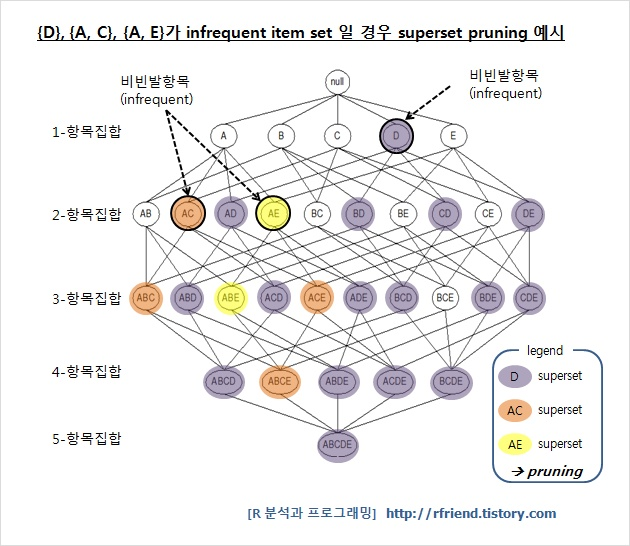
_(출처: https://rfriend.tistory.com/192)_
아이템 집합과 그 관계를 보여주기 위한 그래프이다.  
각 노드는 하나의 아이템 집합, 엣지(선)는 해당 노드에 아이템집합이 포함되어있을 때 연결이 된다.  
### 지지도에 대한 Apriori 원리
- $S(A \rightarrow B)$가 **최소 지지도(min support)**이상이면, 이 규칙을 빈발하다고 한다.  
- 최소 지지도: 사용자가 설정하는 최소 지지도이며, 이 지지도를 넘는 규칙을 빈발하다고 한다.  
이는 아이템 집합에도 적용될 수 있다. (한 아이템 집합의 지지도가 최소 지지도 이상이면 이 집합을 빈발하다고 한다.)  
- 지지도에 대한 Apiori 원리: 어떤 아이템 집합이 빈발하면, 이 아이템의 부분 집합도 빈발한다.  
- X가 Y의 부분집합이면, X의 지지도가 Y의 지지도보다 크거나 같음이 성립된다.  
    - 증명 : X가 Y의 부분집합이면 X의 발생횟수가 Y의 발생횟수보다 크거나 같다.  
    따라서 각 발생횟수를 전체 트랜잭션 횟수로 나눈 각각의 지지도로도 부등호의 방향이 변하지 않는다. 
    
### Apriori 원리의 적용
- AB가 ABC의 부분집합이므로, AB의 지지도는 ABC의 지지도보다 크거나 같다.  
- 만약 AB가 빈발하지 않다고 판단되면, ABC, ABD같은 것들도 빈발하지 않으므로 탐색할 필요가 없다.  


### 지지도에 대한 Apriori 원리: 후보 규칙 생성
- Apriori 원리를 사용하여 **모든 최대 빈발 아이템 집합**을 찾은 후, 후보 규칙을 모두 생성한다.  
    - 최대 빈발 아이템 집합 : 최소 지지도 이상이면서, 이 집합의 모든 모집합이 빈발하지 않는 집합  
    - 예시: {A, B, C}가 빈발한데, {A, B, C, D}, {A, B, C, E} 등이 빈발하지 않으면, {A, B, C}를 최대 빈발 아이템 집합이라고 한다.  
    - {A, B, C}가 최대 빈발 아이템 집합이면 그의 부분집합들도 당연히 빈발하다.  
- 만약 {A, B, C}가 최대 빈발아이템 집합이라면, 생성 가능한 후보 규칙은 다음과 같다.  
    - 각각을 선택한후, 어떤 것을 자식이고 부모로 둘지 모든 경우의 수를 따져서 정하는 방식이다.  
### 신뢰도에 대한 Apriori 원리:
- **동일한 아이템 집합**으로 생성한 규칙 $X_1 \rightarrow Y_1$과 $X_2 \rightarrow Y_2$에 대해서, 다음이 성립함.  
- $X_1 \subset X_2 $이면, $C(X_1 \rightarrow Y_1) \leq C(X_2 \rightarrow Y_2)$ 가 성립
    - X1이 X2의 부분집합인 경우, X1이 부모인 경우 규칙 신뢰도가 X2이 부모인 경우 규칙 신뢰도보다 낮거나 같음
    - 동일한 아이템 집합으로 규칙을 만들었으므로, X1과 Y1의 합집합은 X2와 Y2의 합집합은 같을 것임  
- 증명  
    - 교집합이 분자로 들어감, 즉, X1을 샀을 때 Y1도 샀더라 하는 규칙의 신뢰도는 $$X_1 \rightarrow Y_1 = \frac {N(X_1, Y_1)} {N(X_1)}$$ 이고,  $$X_2 \rightarrow Y_2 = \frac {N(X_2, Y_2)} {N(X_2)}$$
    - 두 규칙이 동일한 아이템 집합으로부터 생성되었으므로 $X_1 \cup Y_1 = X_2 \cup Y_2 $ 성립.  
    - 따라서 둘이 등장한 비율도 같다.
    - 이때 분자는 같지만 분모가 다른 상황인데, $X_1 \subset X_2$, X1이 X2의 부분집합이므로 $N(X_1) \leq N(X_2)$이 성립함.(X2-Y2의 규칙보다 X1-Y2규칙이 신뢰도가 낮음)  

### 신뢰도에 대한 Apriori 원리: 적용
- 먼저 부모에 가능한 많은 집합을 넣는다. 아이템이 n개라면 부모가 n-1 개 -> 자식이 1개.  
- 부모가 작아질수록 신뢰도는 낮아지는데, 만약 {A, B}를 샀을때 -> {C, D}가 최소 신뢰도 이하라면, 이것의 부분집합인 {A}->{B, C, D}와 {B}->{A, C, D}도 마찬가지로 최소 신뢰도 이하이므로 탐색할 필요가 없어진다.  


### 정리
- 지지도에 대한 Apriori 원리는 최대 빈발 아이템 집합을 탐색하는데 사용  
- 신뢰도에 대한 Apriori 원리는 최대 빈발 아이템 집합으로부터 만들어지는 규칙들 중 최소 신뢰도 이하인 것을 탐색하는데 사용된다. 

## 관련 모듈: `mlxtend`

- apriori 함수를 이용한 **빈발 아이템 집합 탐색**과 association_rules 함수를 이용하여 **연관 규칙을 탐색**하는 두 단계로 수행함.

- `mlxtend.frequent_patterns.apriori(df, min_support)`:
    - df: 원핫 인코딩 형태의 데이터 프레임  
    - min_support: 최소 지지도  
    - 결과인 frequent_dataset과 metric연관 규칙 탐색에 사용

- `mlxtend.frequent_patterns.association_rules(frequent_dataset, metric, min_threshold)`:
    - frequent_dataset에서 찾은 연관 규칙을 데이터 프레임 형태로 변환  
    - metric: 연관 규칙을 필터링 하기 이한 유용성 척도(default: confidence).  
    support면 `min_threshold`에 최소 지지도가 입력될 것이고, confidence면 `min_threshold`에 최소 신뢰도가 입력되어야 한다.   
    - min_threshold: 지정한 metric의 최소 기준치
    
### 원핫인코딩: `mlxtend.preprocessing.TransactionEncoder` 사용
지도학습에서 범주형 변수를 처리할 때 자주 사용된다.  

- 연관 규칙 탐사에 적절하게 거래 데이터 구조를 바꾸기 위한 함수이다.  
- 인스턴스 생성후, fit(data).transform(data)를 이용하여 data를 각 아이템의 출현 여부를 갖는 ndarray 및 DataFrame으로 변환한다.  
